# Behind the Curtain -- Campaign Finance Data Analysis
## Thunder Shiviah


# Questions

* When do filings occur?
* What is the distribution of amounts?
* What do the distributions of amounts look like for each Filer?
* What's the difference between filer, contributor, attest, payee?
* Where on the map do the addresses lie?
* What's diff between Emp address and filing address?
* What distributions best fit the data?

# Viz

## When do filings occur?

* Graph date vs contributor name (bubble)
* Graph date vs total amount (line)
* Graph date vs individual amounts (line)

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
#%matplotlib inline

In [4]:
df = pd.read_csv('../../../../work/hack_oregon/competition/data/raw_committee_transactions_comma'
                 , error_bad_lines=False, warn_bad_lines=False, encoding="utf-8-sig") # error_bad_lines=False skips rows that have too many columns, warn_bad_lines silences the warnings.

df.columns

/home/thunder/anaconda3/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (16,19,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


Index(['tran_id', 'original_id', 'tran_date', 'tran_status', 'filer',
       'contributor_payee', 'sub_type', 'amount', 'aggregate_amount',
       'contributor_payee_committee_id', 'filer_id', 'attest_by_name',
       'attest_date', 'review_by_name', 'review_date', 'due_date',
       'occptn_ltr_date', 'pymt_sched_txt', 'purp_desc', 'intrst_rate',
       'check_nbr', 'tran_stsfd_ind', 'filed_by_name', 'filed_date',
       'addr_book_agent_name', 'book_type', 'title_txt', 'occptn_txt',
       'emp_name', 'emp_city', 'emp_state', 'employ_ind', 'self_employ_ind',
       'addr_line1', 'addr_line2', 'city', 'state', 'zip', 'zip_plus_four',
       'county', 'purpose_codes', 'exp_date'],
      dtype='object')

### Graph date vs contributor/filer name (bubble)

* Need date, contributor, filer, amount, aggregate amount

In [5]:
df1 = df.loc[:, ['tran_id', 'tran_date', 'filer', 'contributor_payee', 'amount', 'aggregate_amount']]


In [6]:
df1.sort(columns='amount', ascending=False) # Sort by amount in descending.

,tran_id,tran_date,filer,contributor_payee,amount,aggregate_amount
33763,1889169,2014-10-16,NO on 92 Coalition,DuPont Pioneer,4460000.00,4518150.00
303915,107889,2007-10-02,Stop the Measure 50 Tax Hike,Philip Morris USA Inc.,2500000.00,5639624.52
283644,1872149,2014-10-08,NO on 92 Coalition,Monsanto Company,2500000.00,4085150.00
66100,1809620,2014-08-11,New Approach Oregon,Media Analysis,2267863.02,2267863.02
61200,1354468,2012-10-02,Yes on 82 & 83,PDX Entertainment Group,1952105.55,5418660.55
303947,94614,2007-09-06,Stop the Measure 50 Tax Hike,Philip Morris USA Inc.,1800000.00,3128363.33
291750,90310,2007-08-24,Oregonians Against The Blank Check,Reynolds American,1725550.00,1725550.00
61690,1304408,2012-08-16,Yes on 82 & 83,PDX Entertainment Group,1572000.00,1718826.00
660899,1844162,2014-08-27,NO on 92 Coalition,Monsanto Company,1500000.00,1584150.00
291705,98225,2007-09-17,Oregonians Against The Blank Check,Reynolds American,1466252.00,3271109.10


Remark: Why does ID:3949 (Tran ID:2035966, Filer:Citizen Action for Political Education) have a list amount of \$78703.02 but an aggregate amount of \$0.00? A similar case happens with ID:2335-2336 (Tran ID:2032639-2032640) where the Nurses United Political Action Committee has two donations of \$16901.05 but an aggregate amount of \$0.00.

In [7]:
amounts = df1.iloc[:,4:6]

amounts.describe() # Get stats on amounts

,amount,aggregate_amount
count,763746.000000,763746.000000
mean,756.978239,2695.833899
std,11415.677441,47626.867173
min,-43771.050000,0.000000
25%,26.550000,0.000000
50%,100.000000,163.300000
75%,300.000000,500.000000
max,4460000.000000,6778417.450000


Remark: Why is the min amount negative? How are there negative contributions? Also, the max is over an order of magnitude larger than both third quartiles. I don't think this is a normal distribution.

In [8]:
amount = amounts['amount'] # Histogramming
# amount.value_counts() # Returns count of contribution amounts

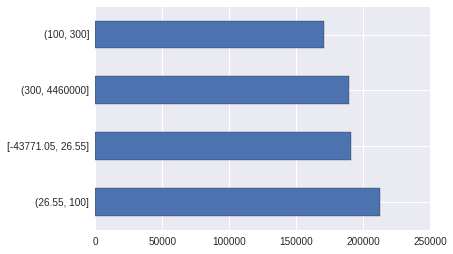

In [9]:
amount_factor = pd.qcut(amount, [0, .25, .5, .75, 1]) # Returns binning based on quartiles
pd.value_counts(amount_factor).plot(kind='barh')

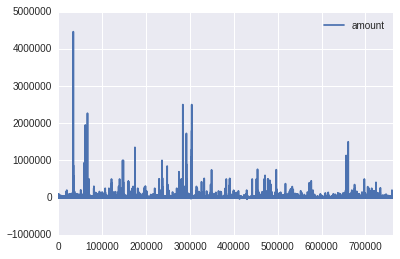

In [10]:
plt.figure(); amount.plot();  plt.legend(loc='best')

The amount quartile categories are:

```
Categories (4, object): [[-2289.44, 25], (25, 56.47], (56.47, 165.5], (165.5, 78703.02]]
```


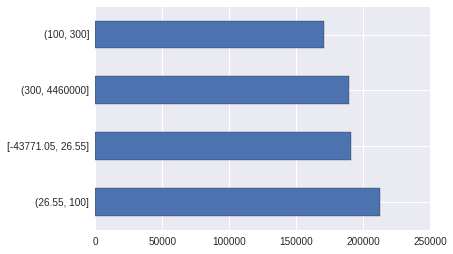

In [11]:
aggregate_amounts = amounts['aggregate_amount']
#aggregate_amounts.value_counts()
agg_amount_factor = pd.qcut(amount, [0, .25, .5, .75, 1]) # Returns binning based on quartiles
pd.value_counts(agg_amount_factor).plot(kind='barh')

The aggregate amount quartile categories are:

```
Categories (4, object): [[-2289.44, 25], (25, 56.47], (56.47, 165.5], (165.5, 78703.02]]
```

Note: See [pandas tablewise function application section](http://pandas.pydata.org/pandas-docs/stable/basics.html#tablewise-function-application) for an overview on using pipes and distribution fitting using statsmodels.



In [12]:
dft = df1.copy() # Make a copy for datetime manipulation.
dft['tran_date'] = pd.to_datetime(dft['tran_date']) 


### Plotting

In [13]:
dft = dft.iloc[:,1:] # Get rid of tran id.


In [14]:
dft = dft[dft > 0] # Replace negative amounts with NaN. Why are there negative amounts?


In [15]:
dft2 = dft.set_index("tran_date") # Index over datetime so we can graph frequencies.
dft2.index = pd.to_datetime(dft2.index)


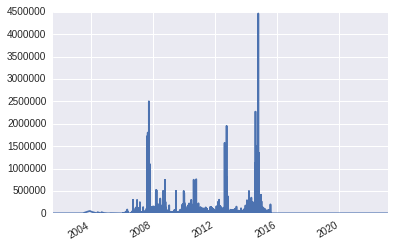

In [33]:
dft2 = dft2.sort_index()
dft3 = dft2[17:]  # Note: Dates look wrong for the first few rows up to row 16 (these were sorted by date)(ex. 0006 or 0207 for year)

dft3.index = pd.to_datetime(dft3.index)
dft3['amount'].plot()

In [32]:
gb = dft3.groupby(pd.TimeGrouper('D')) # Groups contributions by day.
#gb.cumsum().plot() # TODO: How do I sanity check this?

pandas.core.groupby.SeriesGroupBy

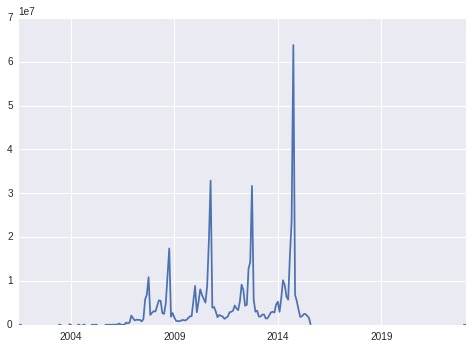

In [39]:
gb = dft3.groupby(pd.TimeGrouper('M')) # Groups contributions by day.
gb['amount'].sum().plot() # Beautiful!!!